In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data cleaning and preparation

In [3]:
df.shape

(1470, 35)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [6]:
df.isnull().sum().loc[lambda x : x>0].shape[0]

0

In [7]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [10]:
df.duplicated().any()

np.False_

In [11]:
df =  df.drop(['employeecount' , 'standardhours' , 'over18','employeenumber'], axis=1)

In [12]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [13]:
df.nunique().value_counts()

4       6
2       4
3       3
5       2
886     1
43      1
29      1
6       1
71      1
9       1
1349    1
1427    1
10      1
15      1
40      1
7       1
37      1
19      1
16      1
18      1
Name: count, dtype: int64

In [14]:
category_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(exclude=['object']).columns
category_data, numerical_data

(Index(['attrition', 'businesstravel', 'department', 'educationfield', 'gender',
        'jobrole', 'maritalstatus', 'overtime'],
       dtype='object'),
 Index(['age', 'dailyrate', 'distancefromhome', 'education',
        'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
        'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
        'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
        'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
        'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
        'yearssincelastpromotion', 'yearswithcurrmanager'],
       dtype='object'))

In [15]:
def value_counts(dataframe, features):
    for feature in features:
        print(f"Value counts for {feature}:")
        print(dataframe[feature].value_counts())
        print("\n")

In [16]:
print(value_counts(df, category_data))

Value counts for attrition:
attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for businesstravel:
businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for department:
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


Value counts for educationfield:
educationfield
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Value counts for gender:
gender
Male      882
Female    588
Name: count, dtype: int64


Value counts for jobrole:
jobrole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director        

In [18]:
df.department.value_counts()

department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [20]:
df.education.value_counts()

education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [22]:
df["education"] = df["education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

In [23]:
df.environmentsatisfaction.value_counts()

environmentsatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [25]:
df["environmentsatisfaction"] = df["environmentsatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [26]:
df.jobinvolvement.value_counts()

jobinvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [27]:
df["jobinvolvement"] = df["jobinvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [28]:
df.joblevel.value_counts()

joblevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [30]:
df["joblevel"] = df["joblevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})

In [31]:
df.jobsatisfaction.value_counts()

jobsatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [32]:
df["jobsatisfaction"] = df["jobsatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [34]:
df["performancerating"] = df["performancerating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

In [35]:
df.relationshipsatisfaction.value_counts()

relationshipsatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [36]:
df["relationshipsatisfaction"] = df["relationshipsatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [37]:
df["worklifebalance"] = df["worklifebalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [38]:
category_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(exclude=['object']).columns

In [39]:
category_data, numerical_data

(Index(['businesstravel', 'department', 'education', 'educationfield',
        'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
        'jobrole', 'jobsatisfaction', 'maritalstatus', 'overtime',
        'performancerating', 'relationshipsatisfaction', 'worklifebalance'],
       dtype='object'),
 Index(['age', 'attrition', 'dailyrate', 'distancefromhome', 'hourlyrate',
        'monthlyincome', 'monthlyrate', 'numcompaniesworked',
        'percentsalaryhike', 'stockoptionlevel', 'totalworkingyears',
        'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
        'yearssincelastpromotion', 'yearswithcurrmanager'],
       dtype='object'))

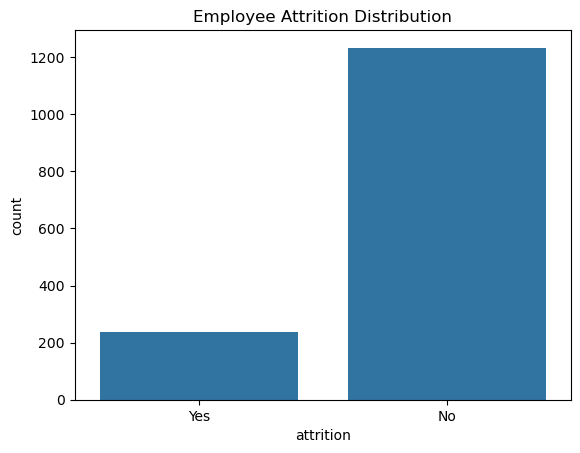

attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [70]:
sns.countplot(x='attrition', data=df)
plt.title('Employee Attrition Distribution')
plt.show()

df['attrition'].value_counts(normalize=True)

In [74]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,Attrition_Numeric
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,0,8,0,Bad,6,4,0,5,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Very High,1,10,3,Better,10,7,1,7,NaN
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Medium,0,7,3,Better,0,0,0,0,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,High,0,8,3,Better,8,7,3,0,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Very High,1,6,3,Better,2,2,2,2,NaN


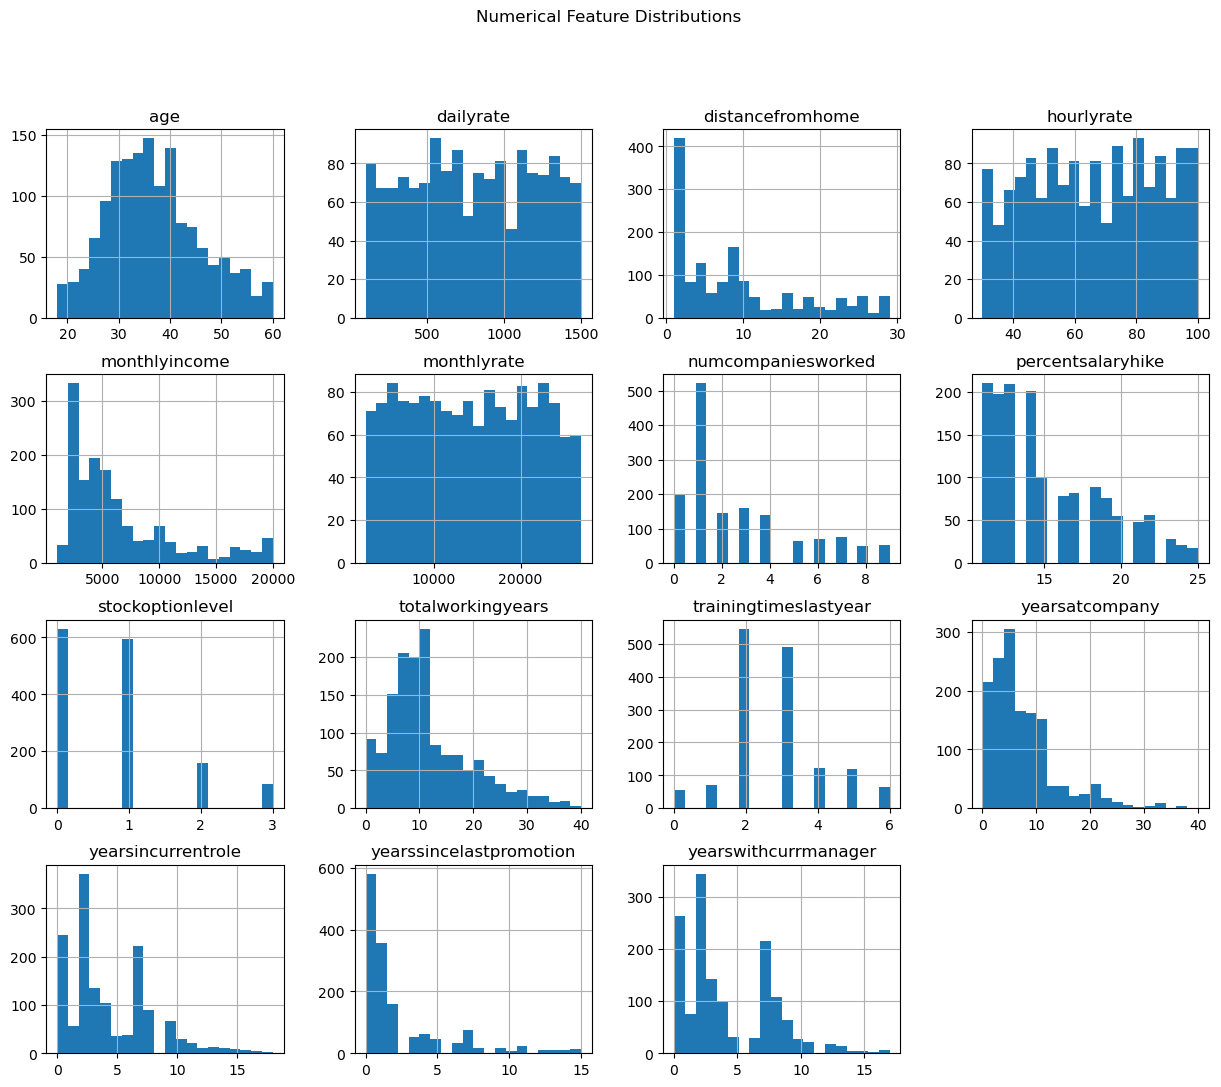

In [75]:
df[numerical_data].hist(figsize=(15,12), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

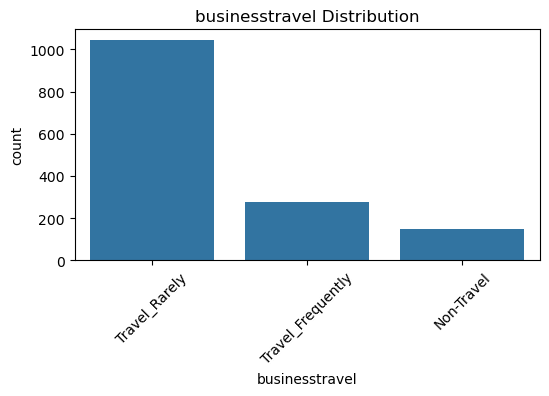

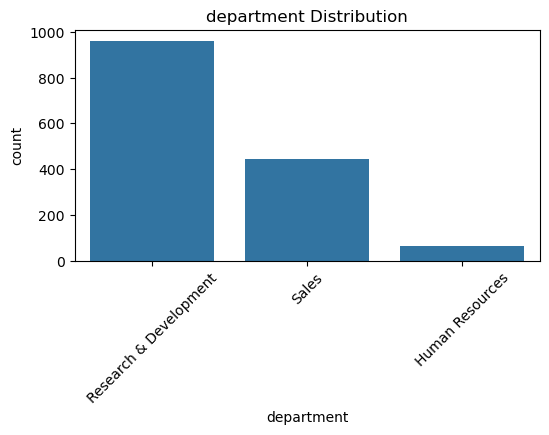

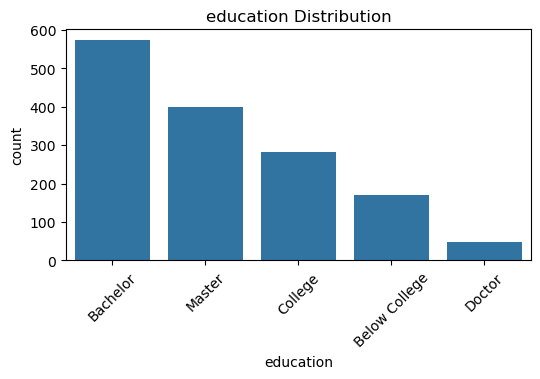

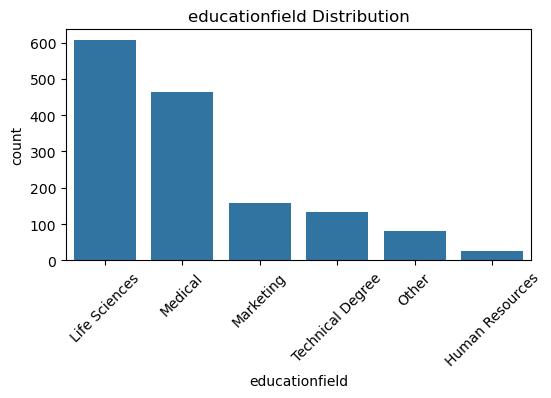

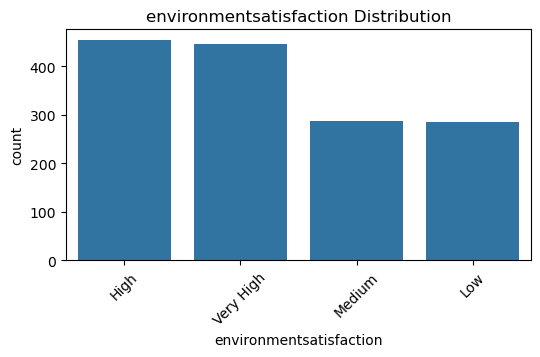

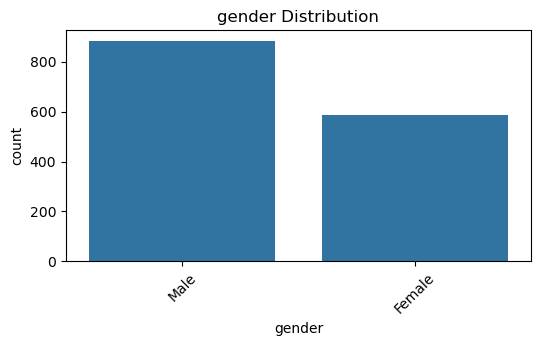

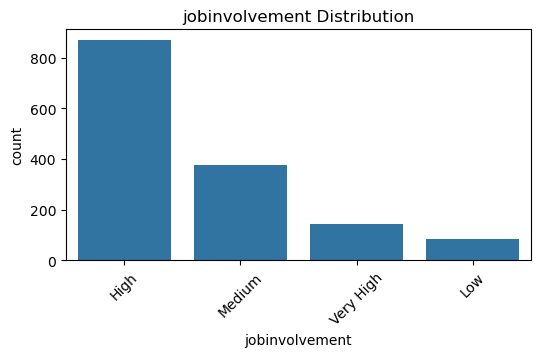

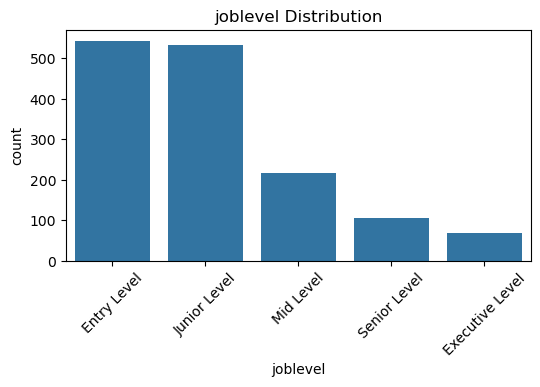

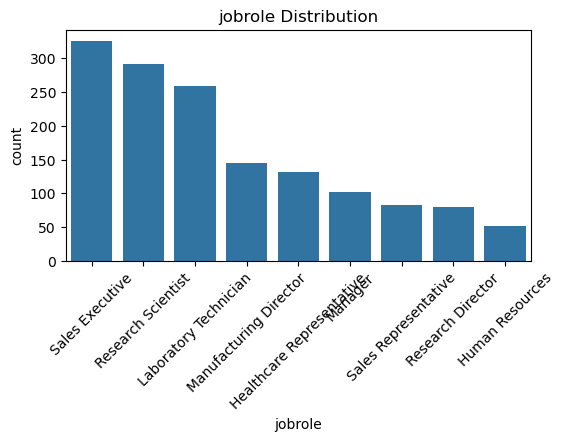

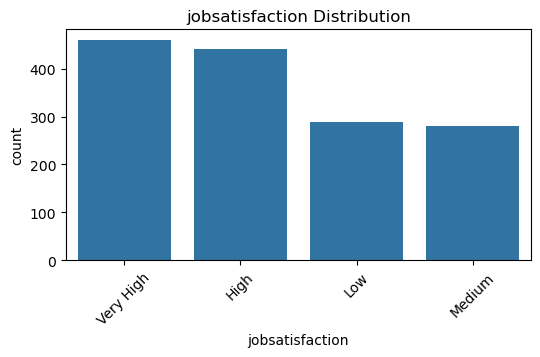

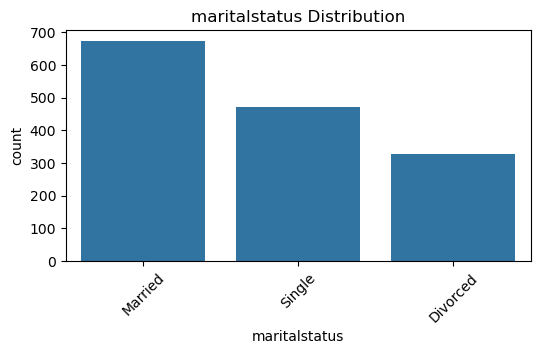

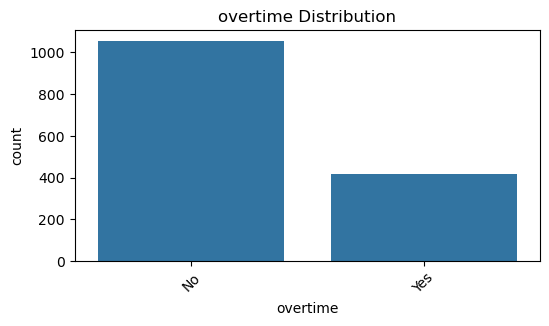

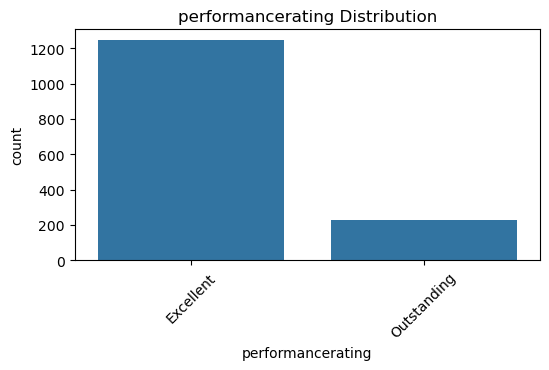

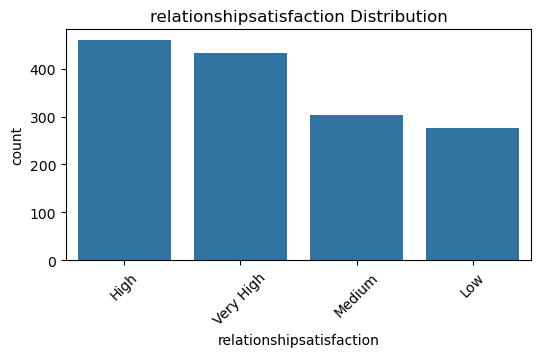

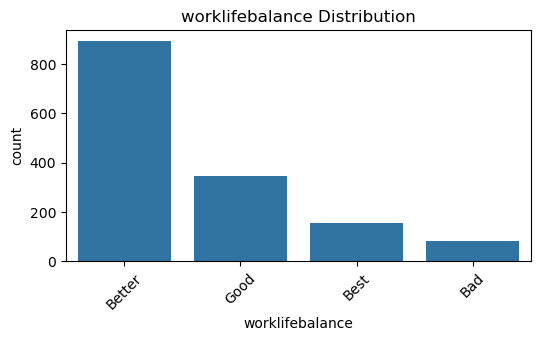

In [76]:
for col in category_data:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

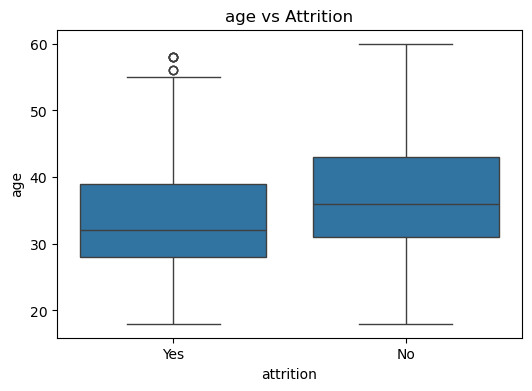

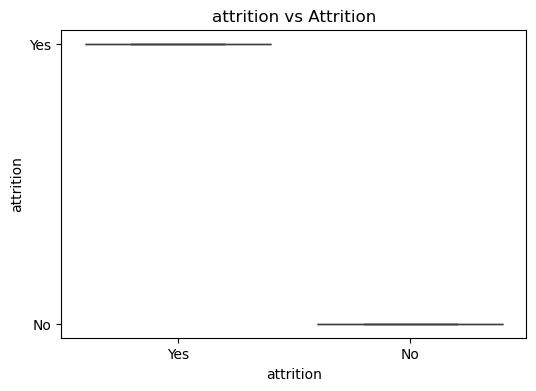

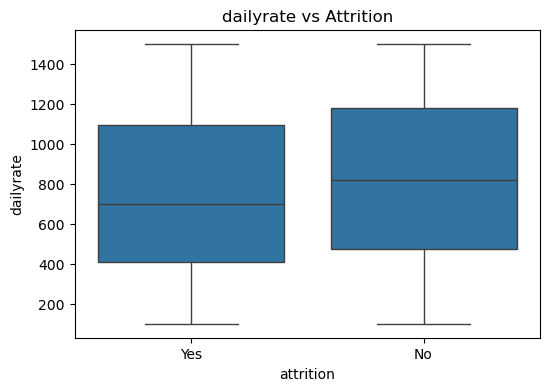

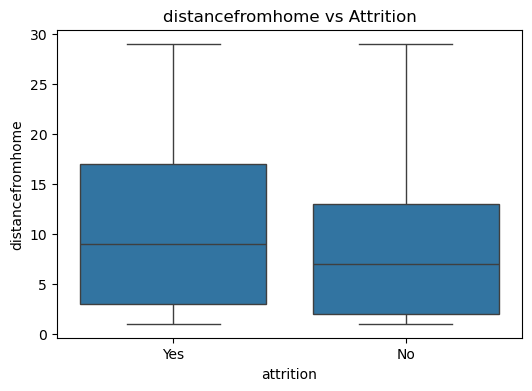

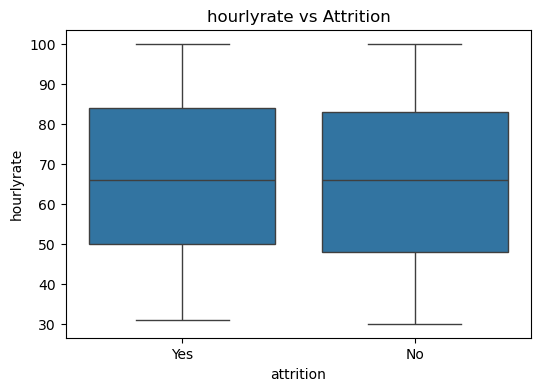

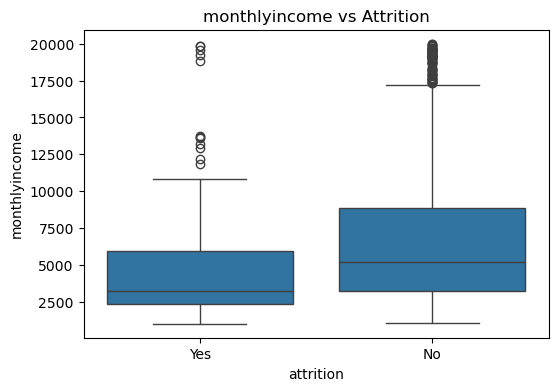

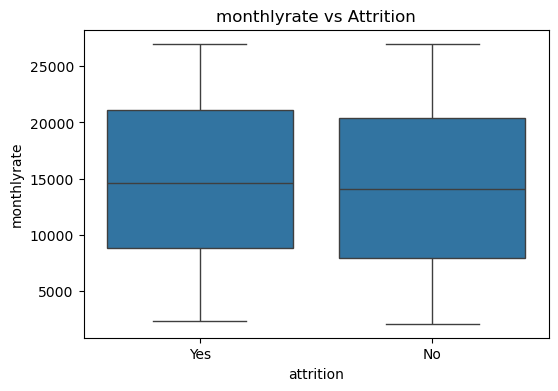

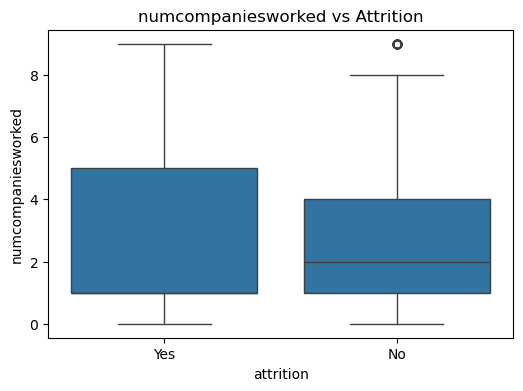

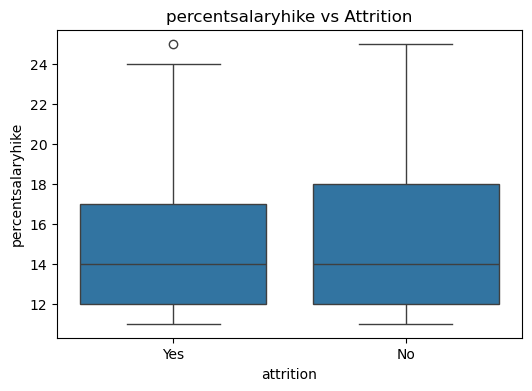

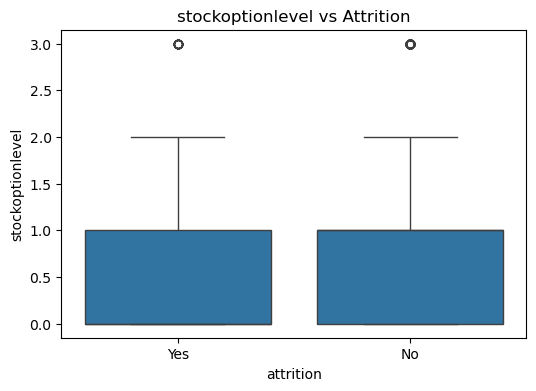

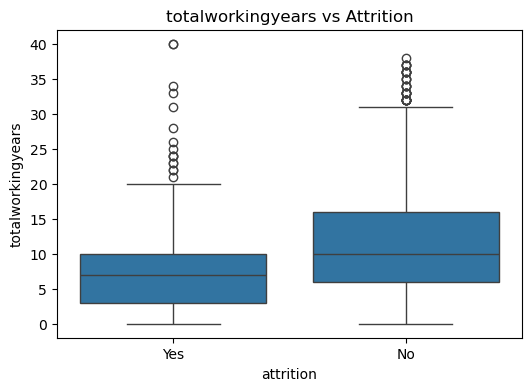

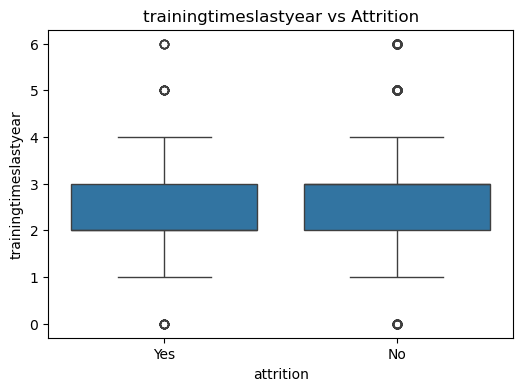

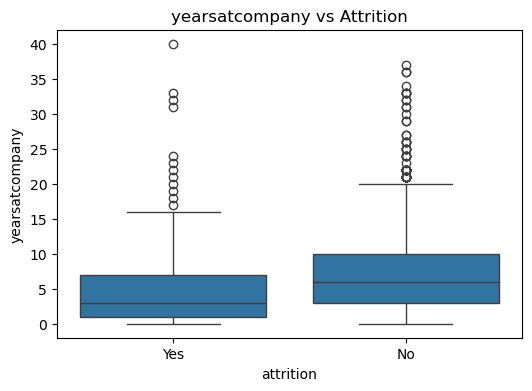

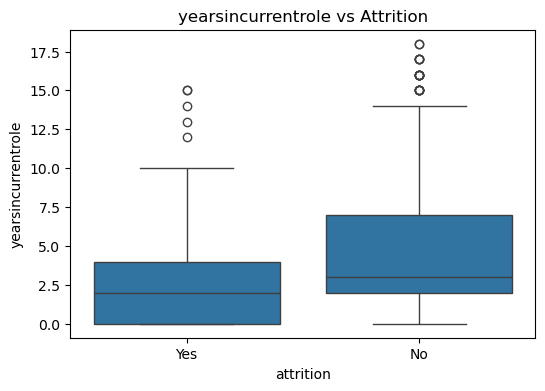

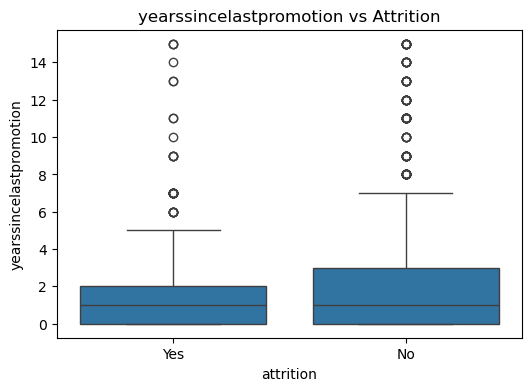

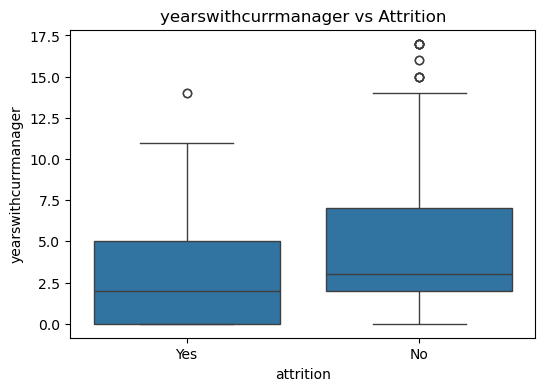

In [77]:
for col in numerical_data:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='attrition', y=col, data=df)
    plt.title(f"{col} vs Attrition")
    plt.show()

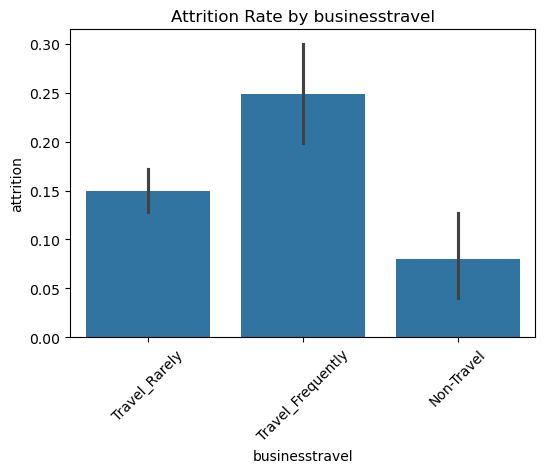

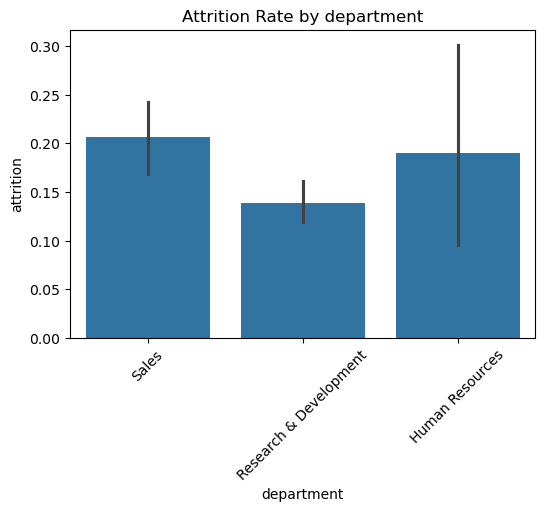

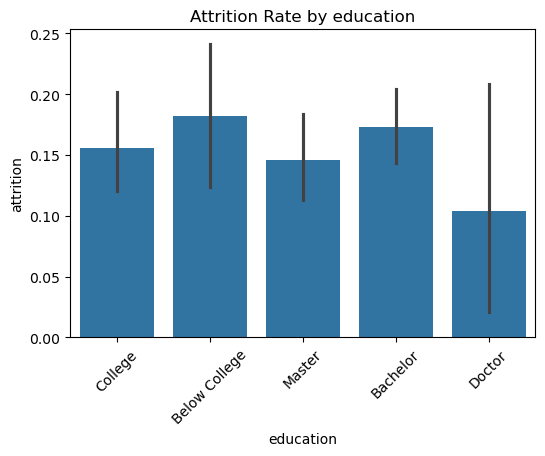

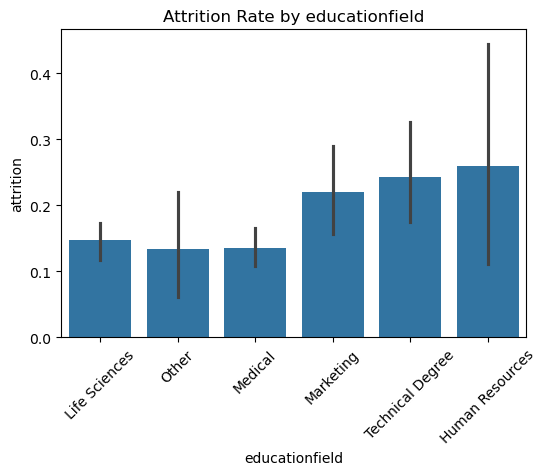

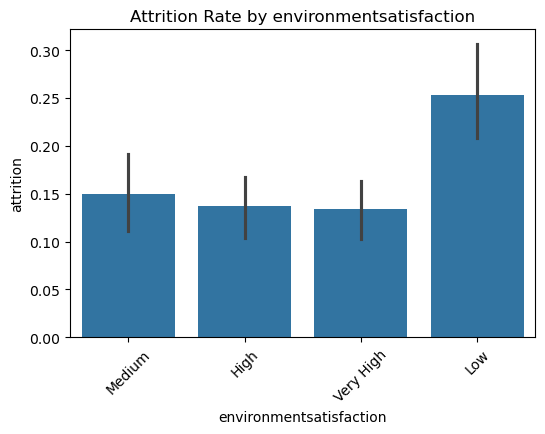

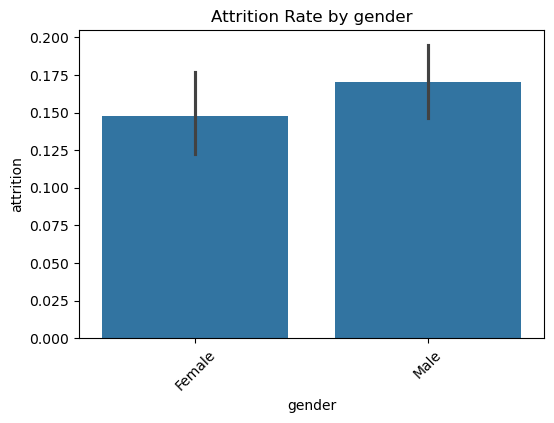

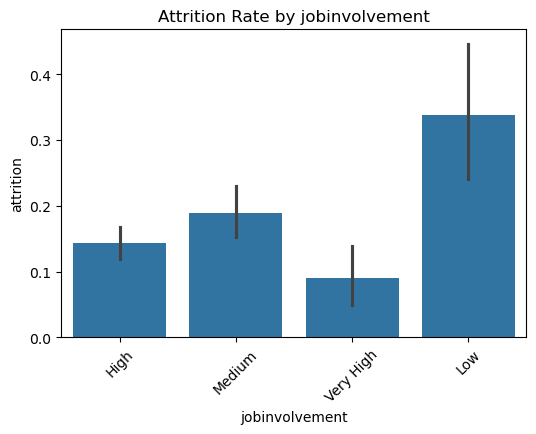

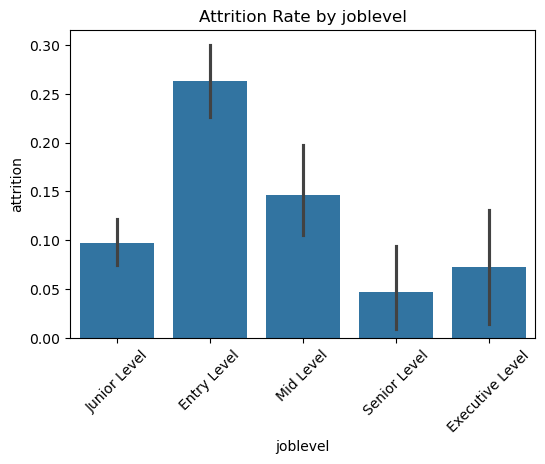

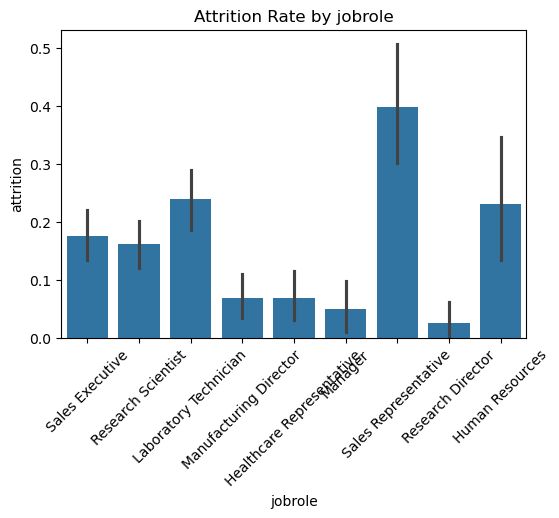

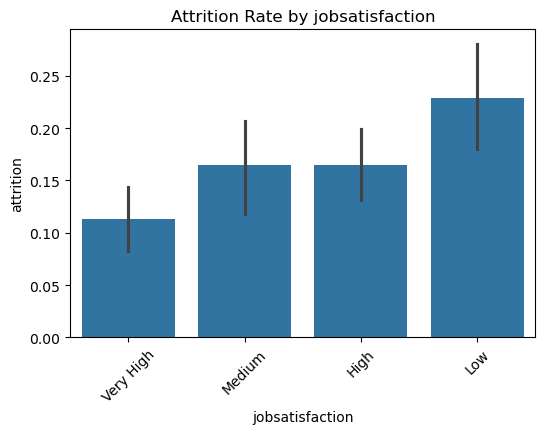

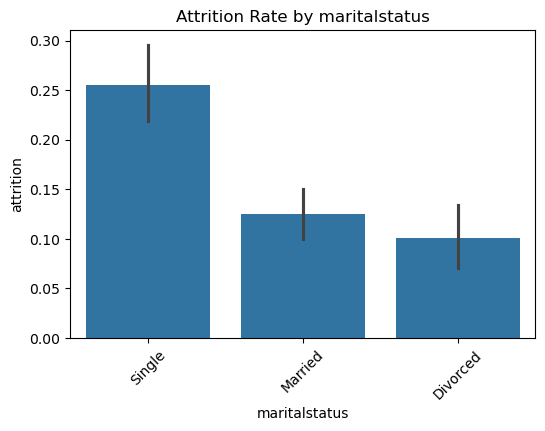

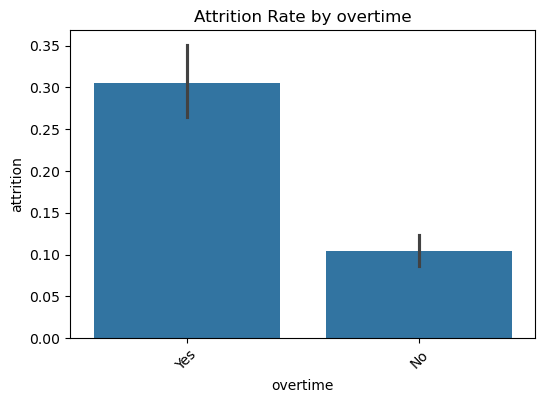

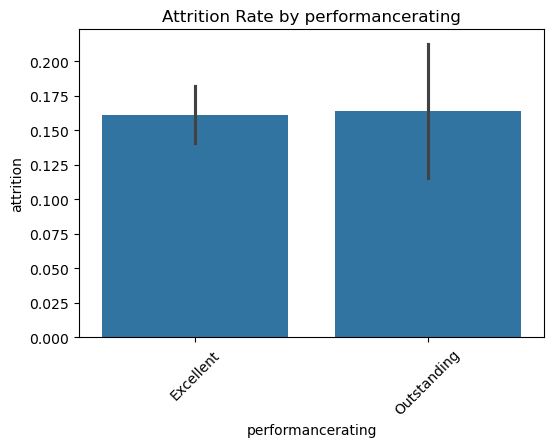

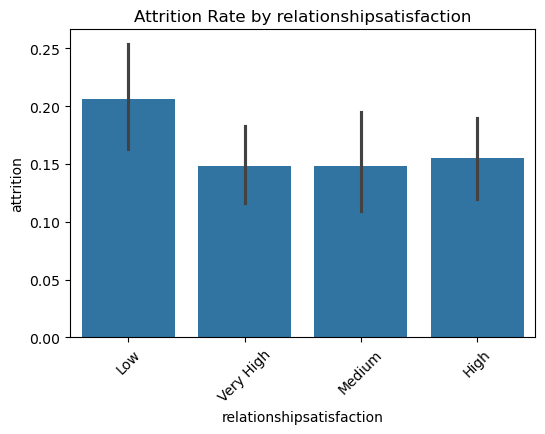

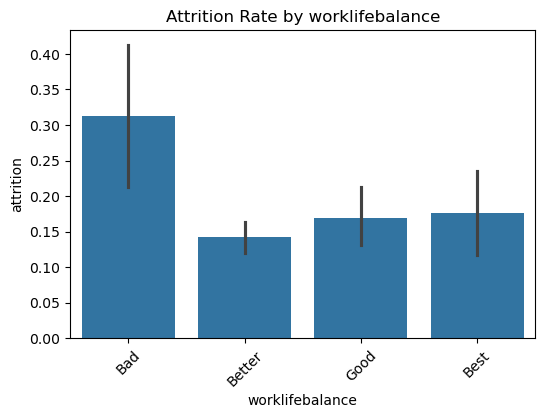

In [81]:

for col in category_data:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y=df['attrition'].apply(lambda x: 1 if x=='Yes' else 0), data=df)
    plt.title(f"Attrition Rate by {col}")
    plt.xticks(rotation=45)
    plt.show() 



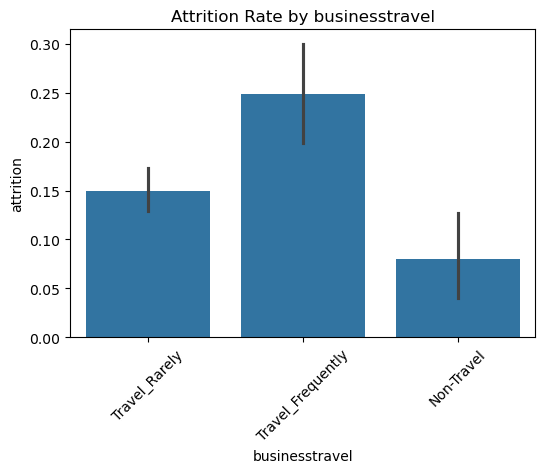

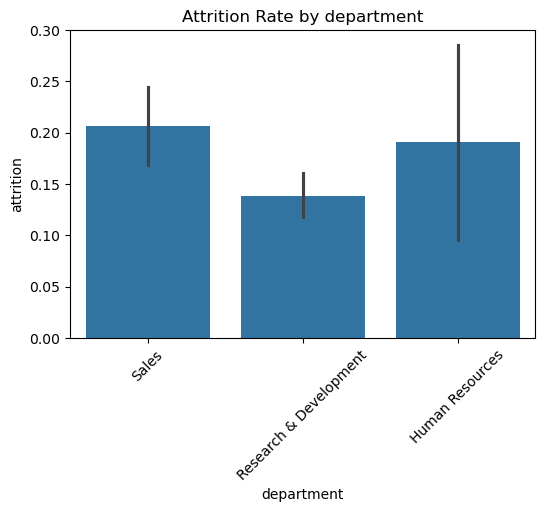

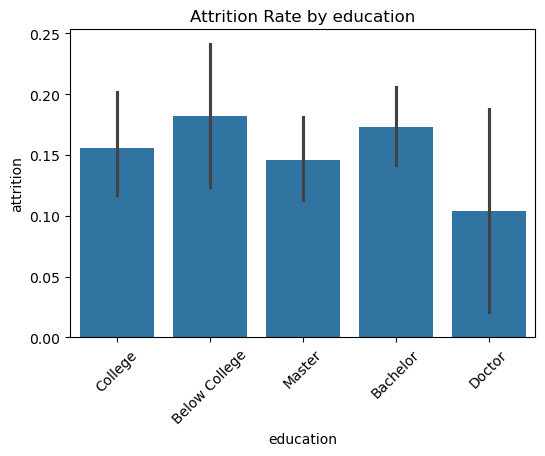

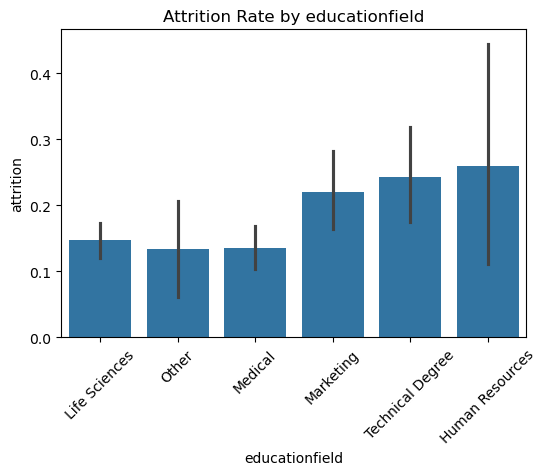

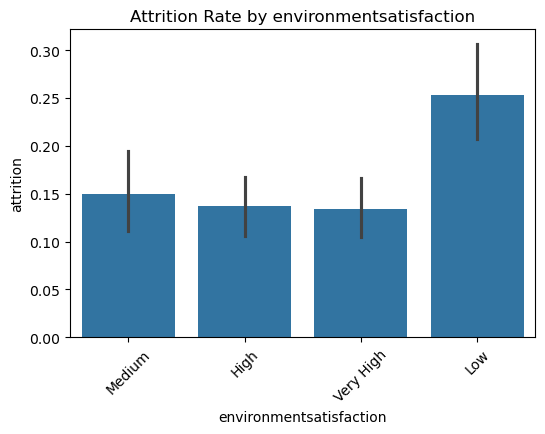

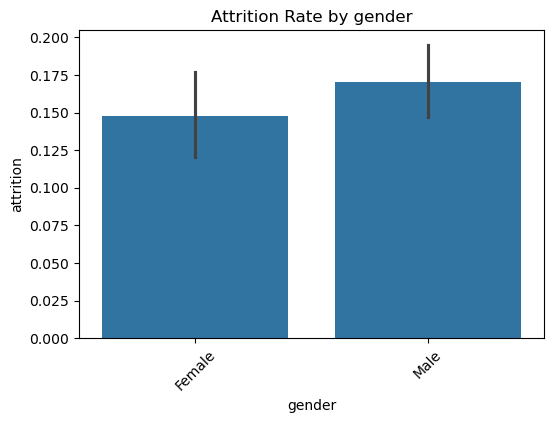

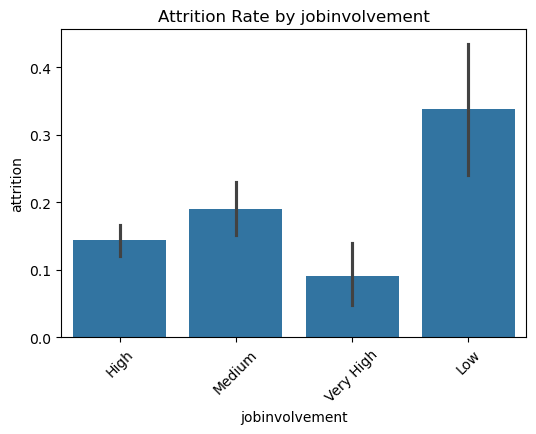

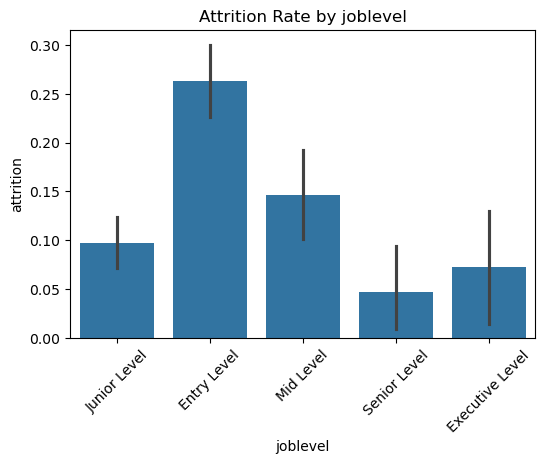

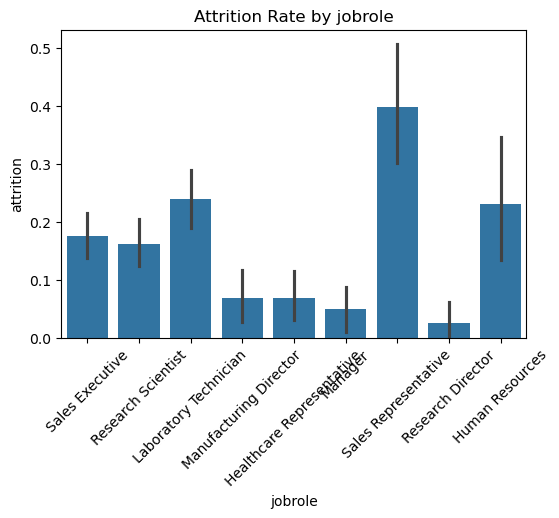

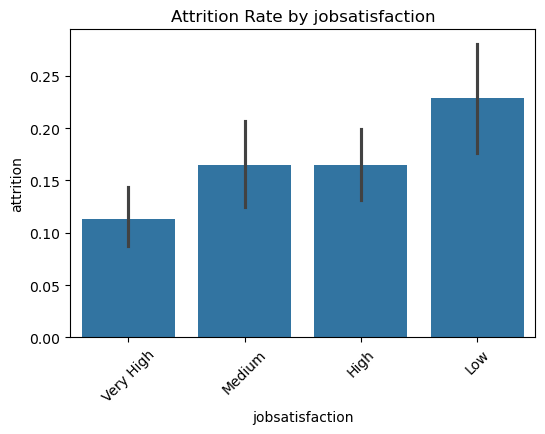

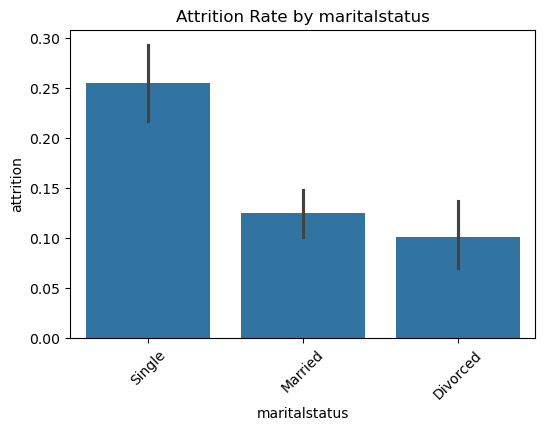

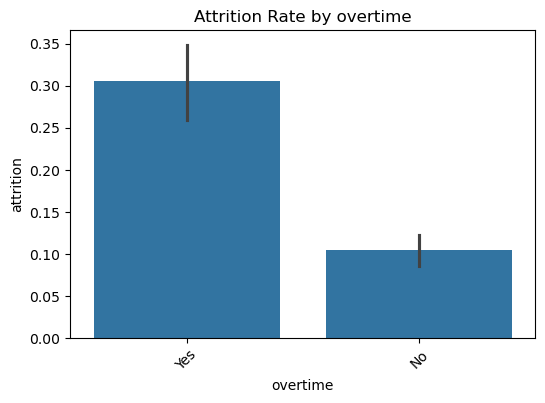

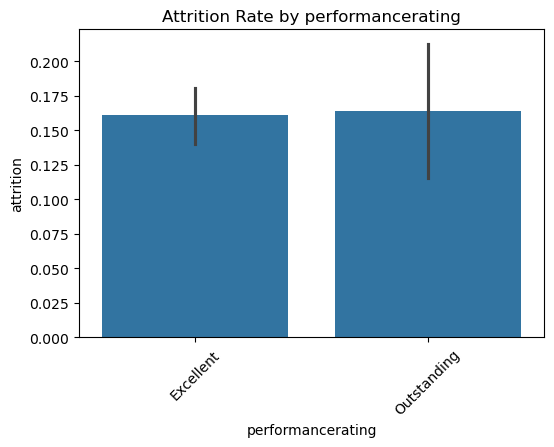

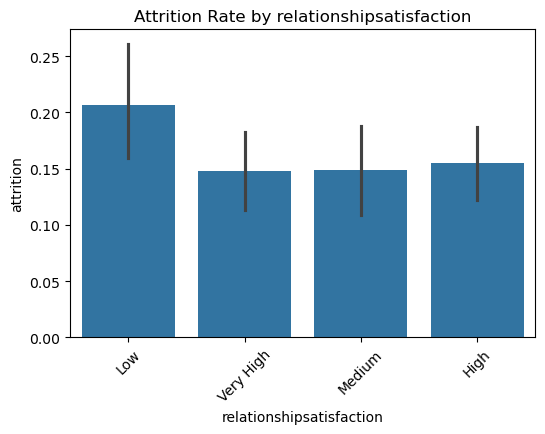

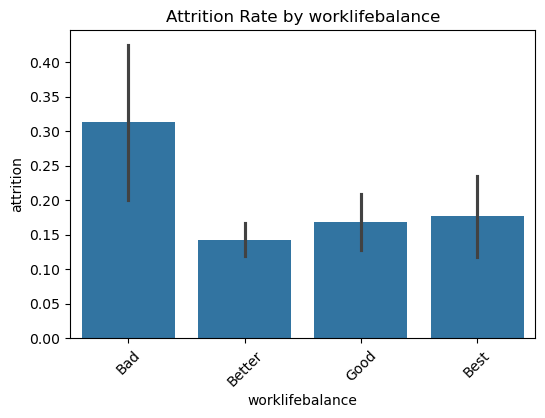

In [82]:
for col in category_data:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y=df['attrition'].apply(lambda x: 1 if x=='Yes' else 0), data=df)
    plt.title(f"Attrition Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()
